## Цель
Выявить определяющие успешность игры закономерности.

In [2]:
# импотртируем необходимые библиотеки до начала работы с кодом
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from math import factorial
import seaborn as sns
import joypy
import warnings
from matplotlib import cm
from matplotlib.colors import rgb2hex


# Шаг 1. Изучение общей информации о таблице

Выведем общую информацию о таблице

In [3]:
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Краткие выводы**: в таблице 16715 строк, 11 столбцов. В таблице имеются пропуски значений. Имеются типы данных: object, float64. Названия столбцов с разным регистром.

Просмотрим общий вид таблицы

In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Краткие выводы**: в таблице видны разнорегистровые названия игр, жанров и платформ. Для выявления неявных дубликатов их нужно перевести к одному регистру, предпочтителен нижний регистр.

Просмотрим уникальные значения каждого столбца, количество и распределение уникальных значений

In [5]:
# просмотрим уникальные значений в столбце Name
print('Уникальные значения столбца {}\n'.format('Name\n'), 
      data['Name'].unique(), '\n',
      '\nОбщее количество уникальных значений столбца {}\n'.format('Name\n'), 
      data['Name'].nunique(), '\n',
      '\nКоличество уникальных значений столбца {}\n{}'.
      format('Name\n', data['Name'].value_counts()), '\n',
     '\nТаблица распределения значений столбца {}\n{}'.
      format('Name\n', data['Name'].describe()), '\n') 

Уникальные значения столбца Name

 ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica'] 
 
Общее количество уникальных значений столбца Name

 11559 
 
Количество уникальных значений столбца Name

Need for Speed: Most Wanted           12
LEGO Marvel Super Heroes               9
Ratatouille                            9
Madden NFL 07                          9
FIFA 14                                9
                                      ..
Go! Go! Hypergrind                     1
Patapon 2                              1
Pokemon Trozei!                        1
Capcom Classics Collection Remixed     1
Johnny Bazookatone                     1
Name: Name, Length: 11559, dtype: int64 
 
Таблица распределения значений столбца Name

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: Name, dtype: object

**Краткие выводы**: в столбце Name содержатся строковые значения названия игр. Чаще всего представлено название следующей игры: Need for Speed: Most Wanted - 12 упоминаний. Общее количество наименований игр - 11559.

In [6]:
# просмотрим уникальные значений в столбце Platform
print('Уникальные значения столбца {}\n'.format('Platform\n'), 
      data['Platform'].unique(), '\n',
      '\nОбщее количество уникальных значений столбца {}\n'.format('Platform\n'), 
      data['Platform'].nunique(), '\n',
      '\nКоличество уникальных значений столбца {}\n{}'.
      format('Platform\n', data['Platform'].value_counts()), '\n',
     '\nТаблица распределения значений столбца {}\n{}'.
      format('Platform\n', data['Platform'].describe()), '\n') 

Уникальные значения столбца Platform

 ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX'] 
 
Общее количество уникальных значений столбца Platform

 31 
 
Количество уникальных значений столбца Platform

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64 
 
Таблица распределения значений столбца Platform

count     16715
unique       31
top         PS2
freq       2161
Name: Platform, dtype: object 



**Краткие выводы**: в столбце Platform содержатся строковые названия игровых платформ, общее количество строк 16715, уникальных значений 31, преобладает упоминание платформы PS2 - 2161 упоминание

In [7]:
# просмотрим уникальные значений в столбце Year_of_Release
print('Уникальные значения столбца {}\n'.format('Year_of_Release\n'), 
      data['Year_of_Release'].unique(), '\n',
      '\nОбщее количество уникальных значений столбца {}\n'.format('Year_of_Release\n'), 
      data['Year_of_Release'].nunique(), '\n',
      '\nКоличество уникальных значений столбца {}\n{}'.
      format('Year_of_Release\n', data['Year_of_Release'].value_counts()), '\n',
     '\nТаблица распределения значений столбца {}\n{}'.
      format('Year_of_Release\n', data['Year_of_Release'].describe()), '\n') 

Уникальные значения столбца Year_of_Release

 [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.] 
 
Общее количество уникальных значений столбца Year_of_Release

 37 
 
Количество уникальных значений столбца Year_of_Release

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64 
 

**Краткие выводы**: в столбце Year_of_Release содержатся числовое значение года издания игры. Общее количество строк 16446. Чаще всего упоминается 2008, 2009 года издания. Замечены значения nan.

In [8]:
# просмотрим уникальных значений в столбце Genre
print('Уникальные значения столбца {}\n'.format('Genre\n'), 
      data['Genre'].unique(), '\n',
      '\nОбщее количество уникальных значений столбца {}\n'.format('Genre\n'), 
      data['Genre'].nunique(), '\n',
      '\nКоличество уникальных значений столбца {}\n{}'.
      format('Genre\n', data['Genre'].value_counts()), '\n',
     '\nТаблица распределения значений столбца {}\n{}'.
      format('Genre\n', data['Genre'].describe()), '\n') 

Уникальные значения столбца Genre

 ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan] 
 
Общее количество уникальных значений столбца Genre

 12 
 
Количество уникальных значений столбца Genre

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64 
 
Таблица распределения значений столбца Genre

count      16713
unique        12
top       Action
freq        3369
Name: Genre, dtype: object 



**Краткие выводы**: в столбце Genre содержатся строковые названия жанров игры. Общее количество строк 16713. Чаще всего упоминается жанр Action - 3369 упоминаний.

In [9]:
# просмотрим уникальных значений в столбце Critic_Score
print('Уникальные значения столбца {}\n'.format('Critic_Score\n'), 
      data['Critic_Score'].unique(), '\n',
      '\nОбщее количество уникальных значений столбца {}\n'.format('Critic_Score\n'), 
      data['Critic_Score'].nunique(), '\n',
      '\nКоличество уникальных значений столбца {}\n{}'.
      format('Critic_Score\n', data['Critic_Score'].value_counts()), '\n',
     '\nТаблица распределения значений столбца {}\n{}'.
      format('Critic_Score\n', data['Critic_Score'].describe()), '\n') 

Уникальные значения столбца Critic_Score

 [76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.] 
 
Общее количество уникальных значений столбца Critic_Score

 82 
 
Количество уникальных значений столбца Critic_Score

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: Critic_Score, Length: 82, dtype: int64 
 
Таблица распределения значений столбца Critic_Score

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64 



**Краткие выводы**: в столбце Critic_Score содержатся числовые значения оценки критиков. Общее количество строк 8137. Чаще всего представлена оценка 70 - 256 раз. Замечены значения nan.

In [10]:
# просмотрим уникальных значений в столбце User_Score
print('Уникальные значения столбца {}\n'.format('User_Score\n'), 
      data['User_Score'].unique(), '\n',
      '\nОбщее количество уникальных значений столбца {}\n'.format('User_Score\n'), 
      data['User_Score'].nunique(), '\n',
      '\nКоличество уникальных значений столбца {}\n{}'.
      format('User_Score\n', data['User_Score'].value_counts()), '\n',
     '\nТаблица распределения значений столбца {}\n{}'.
      format('User_Score\n', data['User_Score'].describe()), '\n') 

Уникальные значения столбца User_Score

 ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7'] 
 
Общее количество уникальных значений столбца User_Score

 96 
 
Количество уникальных значений столбца User_Score

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
2.3       2
1.1       2
0.5       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64 
 
Таблица распределения значений столбца User_Score

count     10014
unique       96
top        

**Краткие выводы**: в столбце User_Score содержатся числовые значения оценки игроков. Общее количество строк 10014. Чаще всего представлена оценка tbd - 2424 раза. Замечены значения nan.

In [11]:
# просмотрим уникальных значений в столбце Rating
print('Уникальные значения столбца {}\n'.format('Rating\n'), 
      data['Rating'].unique(), '\n',
      '\nОбщее количество уникальных значений столбца {}\n'.format('Rating\n'), 
      data['Rating'].nunique(), '\n',
      '\nКоличество уникальных значений столбца {}\n{}'.
      format('Rating\n', data['Rating'].value_counts()), '\n',
     '\nТаблица распределения значений столбца {}\n{}'.
      format('Rating\n', data['Rating'].describe()), '\n') 

Уникальные значения столбца Rating

 ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP'] 
 
Общее количество уникальных значений столбца Rating

 8 
 
Количество уникальных значений столбца Rating

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64 
 
Таблица распределения значений столбца Rating

count     9949
unique       8
top          E
freq      3990
Name: Rating, dtype: object 



**Краткие выводы**: в столбце Rating содержатся строковые обозначения рейтинга игры. Общее количество строк 9949. Чаще всего представлена групп E - 3990 обозначений. Замечены значения nan.

**Выводы**
- в таблице 16715 строк, 11 столбцов. В таблице имеются пропуски значений. Имеются типы данных: object, float64.
- названия столбцов с разным регистром: в таблице видны разнорегистровые названия игр, жанров и платформ. 
- в столбце Name содержатся строковые значения названия игр. Чаще всего представлено название следующей игры: Need for Speed: Most Wanted - 12 упоминаний. Общее количество наименований игр - 11559;
- в столбце Platform содержатся строковые названия игровых платформ, общее количество строк 16715, уникальных значений 31, преобладает упоминание платформы PS2 - 2161 упоминание;
- в столбце Year_of_Release содержатся числовое значение года издания игры. Общее количество строк 16446. Чаще всего упоминается 2008, 2009 года издания. Замечены значения nan;
- в столбце Genre содержатся строковые названия жанров игры. Общее количество строк 16713. Чаще всего упоминается жанр Action - 3369 упоминаний;
- в столбце Critic_Score содержатся числовые значения оценки критиков. Общее количество строк 8137. Чаще всего представлена оценка 70 - 256 раз. Замечены значения nan;
- в столбце User_Score содержатся числовые значения оценки игроков. Общее количество строк 10014. Чаще всего представлена оценка tbd - 2424 раза. Замечены значения nan;
- в столбце Rating содержатся строковые обозначения рейтинга игры. Общее количество строк 9949. Чаще всего представлена групп E - 3990 обозначений. Замечены значения nan.

# Шаг 2. Подготовка данных

## 2.1 Замена названия столбцов (приведение к нижнему регистру)

Заменим названия столбцов на нижние регистры

In [12]:
data.columns = data.columns.str.lower()
# проверим названия столбцов
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Результат**
Cтолбцы переименованы.

## 2.2 Замена типа данных

Исходя из полученной общей информации о таблицах, в ней присутствуют пропуски в значениях различных столбцов. Единственное, тип данных столбца `user_score` нас не устраивает, необъодимо его изменить на числовой для дальнейших манипуляций с ним. Стоит заметить, что в этом столбце есть значения `tbd`, которое не предствлено в описании. Однако суть столбца именно в числовом обозначении рейтинга. Соответственно мы обозначим эти значения как незивестные для нас, по сути они NaN. В остальном, типы данных оставшихся столбцов нас устраивают.

In [13]:
# заменим тип данных в столбце user_score на числовой, 
# с автоматической заменой неизвестных, приводящих к ошибке, значений на nan
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

# и проверим тип данных этого столбца
print('Тип данных столбца \'user_score\':', data['user_score'].dtypes)

Тип данных столбца 'user_score': float64


Заменим вещественный тип данных в нужных нам столбцах на целочисленный

In [14]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

**Результат**: типы данных изменены

## 2.3 Обработка пропусков

Подсчитаем количество пропусков каждого столбца и обоработаем их, где это необходимо

In [15]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Просмотрим какие строчки с отстутствующими названиями игр

In [16]:
display(data[data['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Просмотрим также строчки с отсутствующими обозначениями жанров

In [17]:
display(data[data['genre'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Краткий вывод**: для игр, названия которых не указаны, также не указаны и жанры и оценки критиков и пользователей. Были выпущены в 1993 году на одной платформе GEN, имели маленькие продажи. Принято решение удалить эти пропуски в силу их малочисленности, а равно малозначимости.

In [18]:
data['genre'].dropna(axis=0,inplace=True)

Проверим несколько первых сгруппированных по уровню продаж строк игр с пропущенными годами издания.

In [19]:
data[data['year_of_release'].isna()].sort_values(by=['na_sales', 'eu_sales', 'jp_sales'], ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T


**Краткие выводы**: выявлено, что игры с пропущенными значениями года издания имеют высокий рейтинг и оценку пользователей, выпущены на популярных платформах. Эти данные отбрасывать нельзя. Но пропуски даты издания заменить не удасться какими-либо значениями, видимо следует заменить их на unknown. Возможно было бы поискать год издания игры в интернете или сопоставить их с выпуском соответсвующей игровой платформы, однако это довольно трудоемко в первом случае и все же грубо во втором.

Просмотрим несколько строк игр с пропущенными значениями оценки критиков (и далее, оценке пользователей, рейтингу ESRB) по уровню продаж в регионах

In [20]:
data[data['critic_score'].isna()].sort_values(
    by=['na_sales', 'eu_sales', 'jp_sales'], ascending=False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


По оценке пользователей:

In [21]:
data[data['user_score'].isna()].sort_values(
    by=['na_sales', 'eu_sales', 'jp_sales'], ascending=False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


По рейтингу ESRB:

In [22]:
data[data['rating'].isna()].sort_values(
    by=['year_of_release'], ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.0,0.01,0.00,NaN,NaN,NaN
13183,Kamen Rider: Battride War Genesis,PSV,2016,Action,0.00,0.0,0.05,0.00,NaN,NaN,NaN
10435,Taiko no Tatsujin: Don Don! Mystery Adventure,3DS,2016,Action,0.00,0.0,0.10,0.00,NaN,NaN,NaN
14700,Kenka Bancho Otome,PSV,2016,Action,0.00,0.0,0.03,0.00,NaN,NaN,NaN
16501,River City Ransom SP,3DS,2016,Action,0.00,0.0,0.01,0.00,NaN,NaN,NaN
16362,Crows: Burning Edge,PS4,2016,Action,0.00,0.0,0.01,0.00,NaN,NaN,NaN
16500,Root Letter,PS4,2016,Adventure,0.00,0.0,0.01,0.00,69.0,7.5,NaN
16496,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,PS4,2016,Action,0.00,0.0,0.01,0.00,NaN,NaN,NaN
15627,Uppers,PSV,2016,Action,0.00,0.0,0.02,0.00,NaN,NaN,NaN
7727,MLB 16: The Show,PS3,2016,Action,0.16,0.0,0.00,0.04,NaN,NaN,NaN


**Выводы**
В таблице обнаружено много пропусков в столбацх оценок критиков и пользовательских оценок, а также в столбце оценка рейтинга игры от организации ESRB. Указанные пропуски рейтинга игры от организации ESRB совершены, вероятно, на этапе составления таблицы. Необходимо об этом составить отчет! Для некоторых игр ранних лет изданий вероятно не существовала стабильно действующая система оценок от критиков и пользователей, соотвествтенно их просто могло не быть и не откуда их занести в таблицу.

**Принято решение**: 

На данном этапе избавляться от пропусков не будем, чтобы не потерять важные для работы сведения.

In [23]:
data['user_score'] = data['user_score'] * 10

In [24]:
data['rating'] = data['rating'].fillna(value='unknown')

### 2.3.1 Дополнительные преобразования: дубликаты

Преобразуем все названия игр к нижнему регистру для избавления от возможных неявных дубликатов

In [25]:
# создадим списк столбцов, которые будем приводить к нижнему регистру
columns = ['name', 'platform', 'genre']
# отдадим его циклу перебора значений
for column in columns:
    data[column] = data[column].str.lower()
# выведем обработанную таблицу на экран
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,80.0,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


Также проверим таблицу на наличие явных дубликатов

In [26]:
print('Количество явных дубликатов: {}'.format(data.duplicated().sum()))

Количество явных дубликатов: 0


**Выводы** 
Строковые значения приведены к нижнему регистру, явные дубликаты отсутствуют, вероятность появления явных дубликатов снижена.

## 2.4 Подсчет суммарных продаж во всех регионах и запись их в отдельный столбец

Запишем суммарные продажи во всех регионах для каждой игры в новый столбец, назовем его `total_sales`.

In [27]:
# применим метод .apply() к необходимым нам столбцам и применим его к строкам
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].apply(sum, axis=1)
# выведем таблицу на экран
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


Дополнительно преобразуем оценку пользователей для приведения к единому формату с оценками критиков, для удобства их сопоставления в будущем

**Общие выводы**
 - проанализированы пропуски в столбцах: выдвинуты предположения их появления
 - таблица проверена на наличие явных дубликатов (их 0)
 - снижена вероятность появления неявных дубликатов (приведены названия игр, платформ, и жанров к нижнему регистру)
 - изменены типы данных некоторых столбцов, с соответствующей заменой неясных строковых значений на значения NaN
 - добавлен столбец общих продаж в таблицу, произведены расчеты суммы продаж со всех регионов
 - приведены к общему формату оценки пользователей, в соответствии с оценками критиков

Согласно кратким поэтапным выводам следует: 
- для игр, названия которых не указаны, также не указаны и жанры и оценки критиков и пользователей. Эти игры были выпущены в 1993 году на одной платформе GEN, имели маленькие продажи.
- выявлено, что игры с пропущенными значениями года издания имеют высокий рейтинг и оценку пользователей, выпущены на популярных платформах. Было принято решение не отбрасывать эти данные. 
- в таблице обнаружено много пропусков в столбацх оценок критиков и пользовательских оценок, а также в столбце оценки рейтинга игры от организации ESRB. Указанные пропуски рейтинга игры от организации ESRB вероятно совершены на этапе составления таблицы. Можно предположить, что для некоторых игр ранних лет изданий не существовала стабильно действующая система оценок от критиков и пользователей, соотвествтенно их просто могло не быть и не откуда их занести в таблицу.

# Шаг 3. Исследовательский анализ данных

## 3.1 Проверка выпускаемых игр в разные годы.

Проверим, какое количество игр выпускалось в разные годы. Для этого составим сводную таблицу.

In [28]:
# создадим сводную таблицу, подсчитываающее количество выпускаемых с привязкой к году
games_in_year_count = data.pivot_table(index='year_of_release', values='name',
                                       aggfunc='count').reset_index()

# заменим названия столбцов
games_in_year_count.columns = ['year_of_release', 'count_games']

# выведем таблицу на экран
display('Сводная таблица количетсва выпускаемых игр в год (первые 10 строк)', games_in_year_count.head(10))

'Сводная таблица количетсва выпускаемых игр в год (первые 10 строк)'

,year_of_release,count_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


**Промежуточные выводы**: видно, что в период с 2006 г. по 2011 г. выпусклось больше всего игр в год.

Проверим распределение выпускаемых игр в каждый год с помощью столбчатой диаграммы

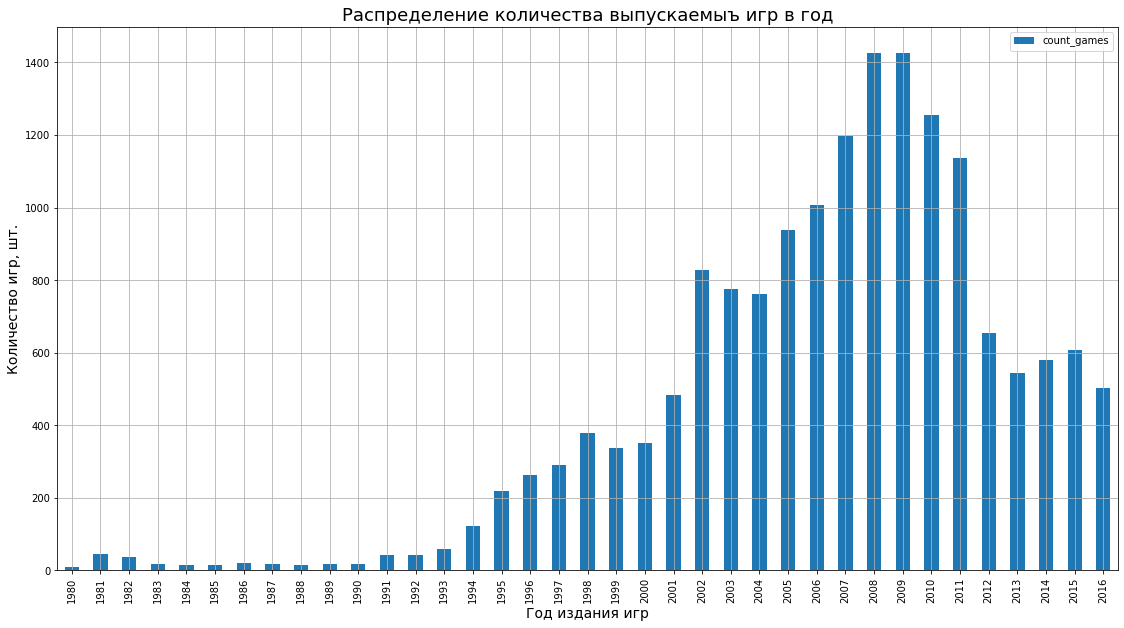

Таблица распределения количества выпускаемых игр в год:
        year_of_release  count_games
count             37.0         37.0
mean            1998.0        444.0
std               11.0        452.0
min             1980.0          9.0
25%             1989.0         36.0
50%             1998.0        338.0
75%             2007.0        762.0
max             2016.0       1427.0


In [29]:
# построим столбчатую диаграму распределения количества выпускаемых игр в год
games_in_year_count.plot(x='year_of_release', kind='bar', figsize=(19, 10), grid=True)

plt.title('Распределение количества выпускаемыъ игр в год', fontsize=18)
plt.xlabel('Год издания игр', fontsize=14)
plt.ylabel('Количество игр, шт.', fontsize=14)
plt.show()

print('Таблица распределения количества выпускаемых игр в год:\n {}'
      .format(round(games_in_year_count.describe())))

Видно, что распределение с длинным "хвостом". Медианы и средние количества выпускаемых игр значительно различаются, проверим наглядно в другом графиеческом представлении, с помощью "ящика с усами".

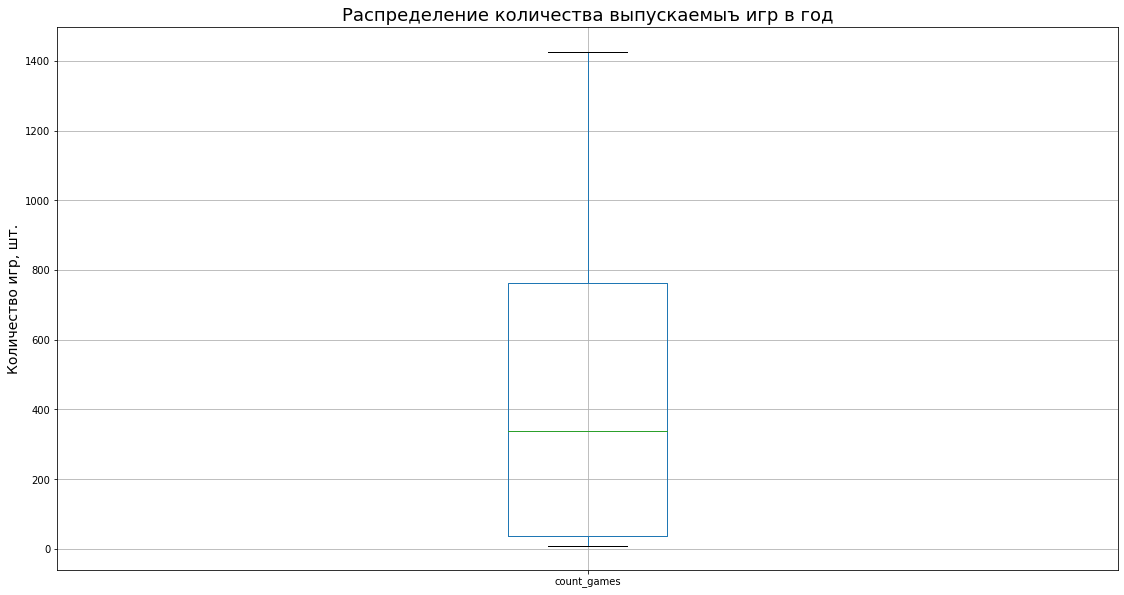

In [30]:
games_in_year_count.plot(x='year_of_release', kind='box', figsize=(19,10), grid=True)
plt.title('Распределение количества выпускаемыъ игр в год', fontsize=18)
plt.ylabel('Количество игр, шт.', fontsize=14)
plt.show()

**Выводы**
Из анализа распределения количества выпускаемы игр в год видно, что  распредлеение неравномерно, имеет "длинный хвост" количества продаж в поздние годы. Объемы выпускаемых игр резко увеличились с 2006 года, в период с 2006 г. по 2011 г. выпусклось больше всего игр в год.

## 3.2 Определение наибольших суммарных продаж по платформам и распределение по годам. Определение срока жизни платформ

Определим суммарные продажи платформ в год, тем самым мы сможем определить, какие платформы не актуальны, вышли из рынка, а значит, сможем отсеить лишние данные.

In [31]:
top_10_sales_platform = data.pivot_table(
    index=['platform'], values='total_sales', 
    aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10).reset_index()
print('Таблица топ-10 продаваемых платформ:\n', top_10_sales_platform)

Таблица топ-10 продаваемых платформ:
   platform  total_sales
0      ps2      1255.77
1     x360       971.42
2      ps3       939.65
3      wii       907.51
4       ds       806.12
5       ps       730.86
6      gba       317.85
7      ps4       314.14
8      psp       294.05
9       pc       259.52


**Промежуточные результаты**: выведены топ-10 продаваемых игр игровых платформ.

Создадим список топ-10 продаваемых платформ для дальнейшей удобной фильтрации

In [32]:
top_10_sales_platform_list = list(top_10_sales_platform['platform'])

Получим отфильтрованную таблицу самых продаваемых платформ

In [33]:
top_10_platforms = data.query('platform in @top_10_sales_platform_list').reset_index(drop=True)

display('Отфильтрованная таблица топ-10 продаваемых игр платформ', top_10_platforms)

'Отфильтрованная таблица топ-10 продаваемых игр платформ'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
2,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
3,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
4,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
12814,woody woodpecker in crazy castle 5,gba,2002,platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01
12815,score international baja 1000: the official game,ps2,2008,racing,0.00,0.00,0.00,0.00,NaN,NaN,unknown,0.00
12816,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
12817,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01


Далее, по отфильтрованной таблице проверим количество продаваемых игр на каждой платформе в год. Для этого сведем необходимые столбцы в сводную таблицу.

In [34]:
top10_platform_in_year = top_10_platforms.pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='sum').reset_index()

display('Сводная таблица продаж каждой актуальной платформы в год', top10_platform_in_year)

'Сводная таблица продаж каждой актуальной платформы в год'

,year_of_release,platform,total_sales
0,1985,ds,0.02
1,1985,pc,0.04
2,1988,pc,0.03
3,1992,pc,3.03
4,1994,pc,12.87
...,...,...,...
112,2016,pc,5.25
113,2016,ps3,3.60
114,2016,ps4,69.25
115,2016,wii,0.18


Полученную таблицу уже легко вывести на экран в виде графиков, по которым можно отследить срок жизни платформ и определить наиболее перспективные платформы на следующий год. Приступим.

Для начала построим столбчатую диаграму совместно с распределением уровня продаж каждой платформы на одном графике

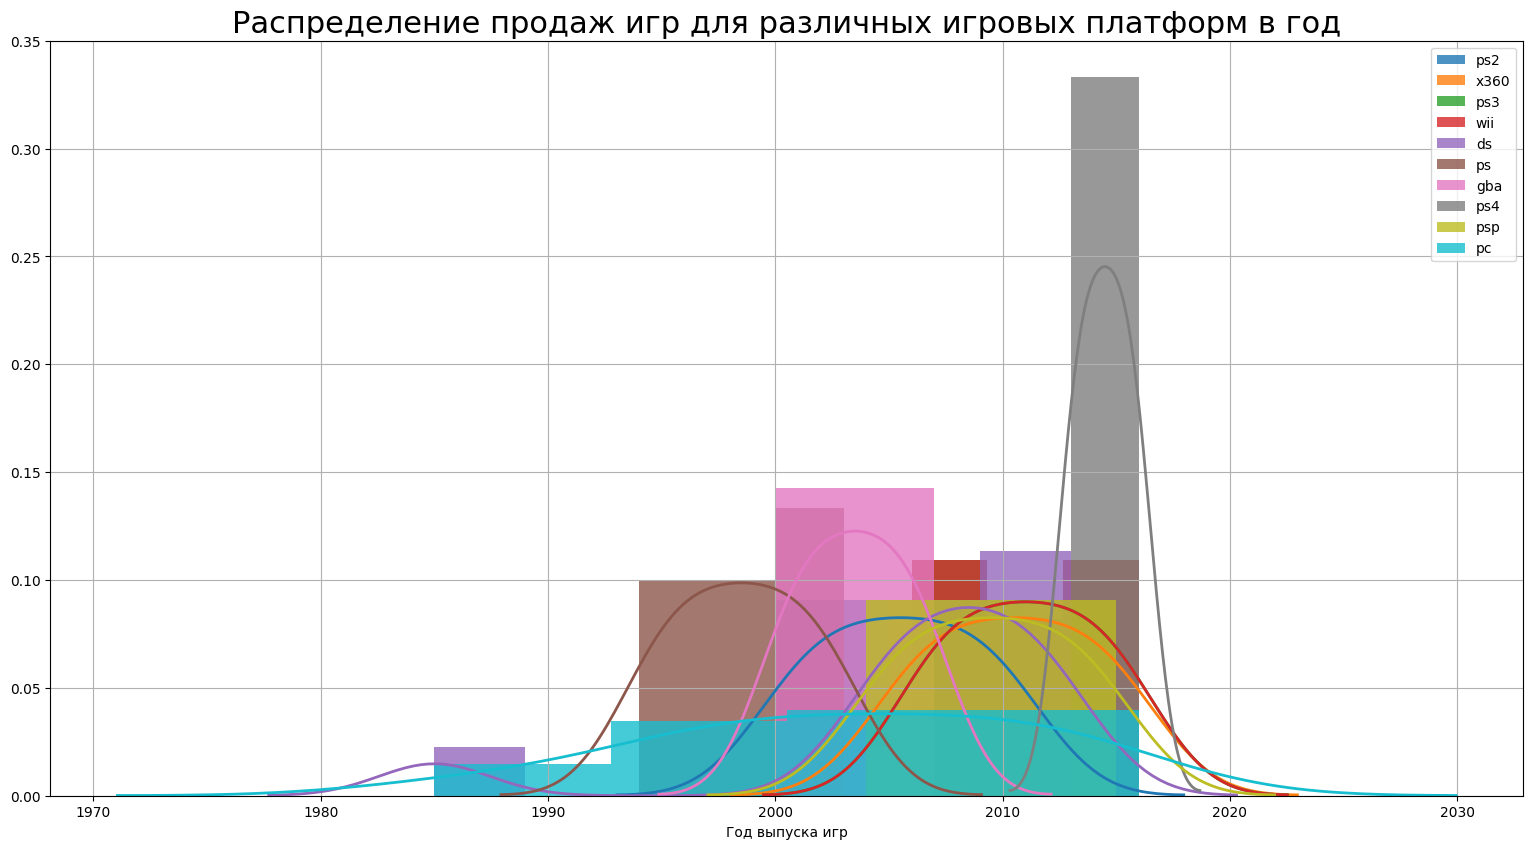

In [35]:
# создадим цикл отрисовки столбчатой диаграмы с распределением уровня продаж каждой платформы
plt.figure(figsize=(19,10), dpi= 100)
plt.grid()

# цикл перебора значений в сводной таблице топ-10 платформ
for i in top_10_sales_platform_list:
    sns.distplot(top10_platform_in_year.loc[top10_platform_in_year['platform'] == i, "year_of_release"], label=i, hist_kws={'alpha':.8}, kde_kws={'linewidth':2})
    
plt.title('Распределение продаж игр для различных игровых платформ в год', fontsize=22)
plt.legend()
plt.xlabel('Год выпуска игр')
plt.show()

**Промежуточные выводы**: видно, что у платформы ps4 имеется наибольший столбец по продажам, что свидетельствует об ее актуальности и растущей популярности. Можно также отметить, что в среднем, платформы "живут" около 10-15 лет, за редким исключением (исключение - платформа pc). 

Для большей наглядности выведем еще один график соотношения продаж разных платформ каждый год.

<Figure size 1900x1000 with 0 Axes>

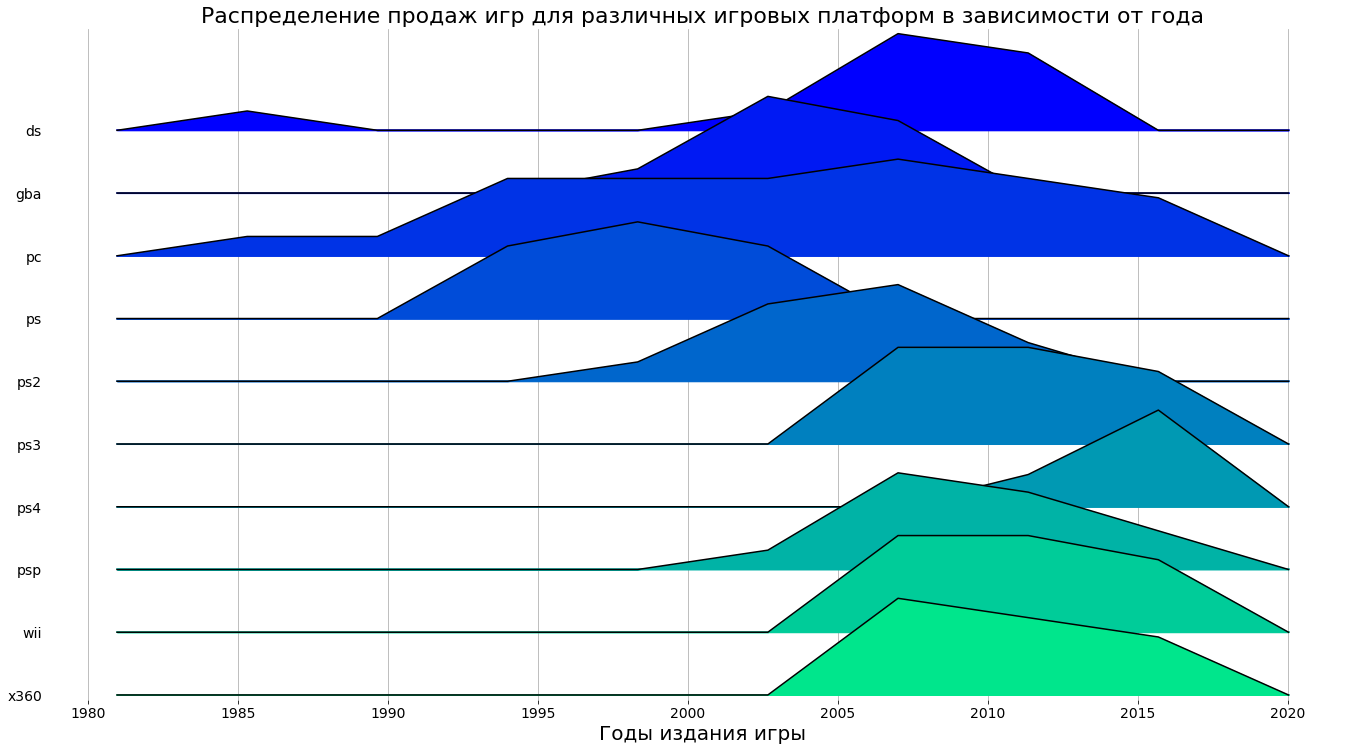

In [36]:
# уберем вспылывающие ошибки при построении графического рисунка
warnings.filterwarnings("ignore")

# построим график соотношения уровня продаж каждой платформы, где сверху вниз продажи растут, о чем свидетельствует измение цвета
plt.figure(figsize=(19,10), dpi= 100)
fig, axes = joypy.joyplot(top10_platform_in_year, kind='normalized_counts', column=['year_of_release'], by='platform', ylim='own', 
                          ylabelsize=14, xlabelsize=14, figsize=(19,10), colormap=[cm.winter], overlap=1)
plt.title('Распределение продаж игр для различных игровых платформ в зависимости от года', fontsize=22)
plt.grid()
plt.xlabel('Годы издания игры', fontsize=20)
plt.ylabel('Платформы', fontsize=20)
plt.show()

Добавим более информативные графики общих продаж актуальных платформ

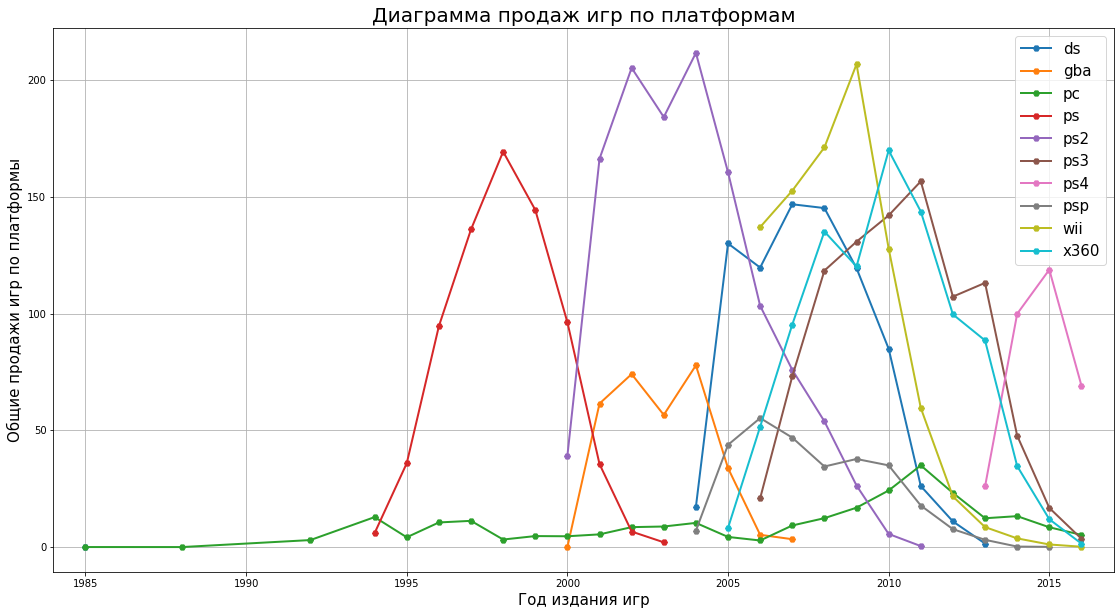

In [37]:
# cоздадим таблицу для отображения общих продаж актуальных платформ 
# и посторим по ней диаграму распределения продаж в год
top_10_platforms.pivot_table(
    index='year_of_release', columns='platform', 
    values='total_sales', aggfunc='sum').plot(marker='H', figsize=(19, 10), lw=2)

# декорируем график
plt.xlim(1984, 2017)
plt.title('Диаграмма продаж игр по платформам', fontsize=20)
plt.grid()
plt.legend(fontsize=15)
plt.xlabel('Год издания игр', fontsize=15)
plt.ylabel('Общие продажи игр по платформы', fontsize=15)
plt.show()

**Выводы**: можно отметить более четко актуальный период для прогноза продаж, а также четко выделить лидирующую платформу - ps4. В то же время продажи некоторых платформ вовсе сошли на нет, другие же значительно отстают от лидера.

Подсчитаем "среднее время жизни" каждой актуальной платформы

In [38]:
# для удобства подсчета создадим сводную таблицу выпуски первой игры и последней каждой платформы
mean_life_platf = top_10_platforms.sort_values(by='year_of_release').pivot_table(
    index='platform', values='year_of_release', aggfunc=['first', 'last']).reset_index()

# переименуем столбцы, уберем "двухэтажные" названия
mean_life_platf.columns = ['platform', 'first_yor', 'last_yor']

# произведем подсчет разницы между первой игрой и последней и добавим в новый столбец результат
mean_life_platf['life'] = mean_life_platf['last_yor'] - mean_life_platf['first_yor']

# выведем на экран
display('Таблица распределения времени жизни платформ', mean_life_platf['life'].describe().astype('int'))

'Таблица распределения времени жизни платформ'

count    10
mean     13
std       9
min       3
25%       9
50%      10
75%      11
max      31
Name: life, dtype: int64

**Выводы**: видно, что среднее время жизни актуальных платформ колеблется от 10 до 13 лет. Из графиков видно, что наиболее актуальный период будет соответствоать 2015 году, в которых виден рост продаж платформы ps4, сохраняющуюся актуальность платформ wii, x360, ps3 и стабильный уровнь продаж игр также остается на платформе pc. Остальные же платформы либо уже не актуальны к 2015 году, либо объем их продаж уверенно снижается. Таким образом, принимаем актуальный период, начинающийся с 2015 года.

In [39]:
actual_data = top_10_platforms.query('year_of_release >= 2015').reset_index(drop=True)
display('Таблица актуального периода (2015-2016 гг.:)', actual_data)

'Таблица актуального периода (2015-2016 гг.:)'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
1,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,43.0,E,8.58
2,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
3,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85.0,50.0,E,7.60
4,fallout 4,ps4,2015,role-playing,2.53,3.27,0.24,1.13,87.0,65.0,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
567,naruto shippuden: ultimate ninja storm collection,ps3,2016,action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
568,farming 2017 - the simulation,ps4,2016,simulation,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
569,codename: panzers complete collection,pc,2016,strategy,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
570,dynasty warriors: eiketsuden,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


Посторим график динамики изменения суммы общих продаж различных платформ для актуального периода

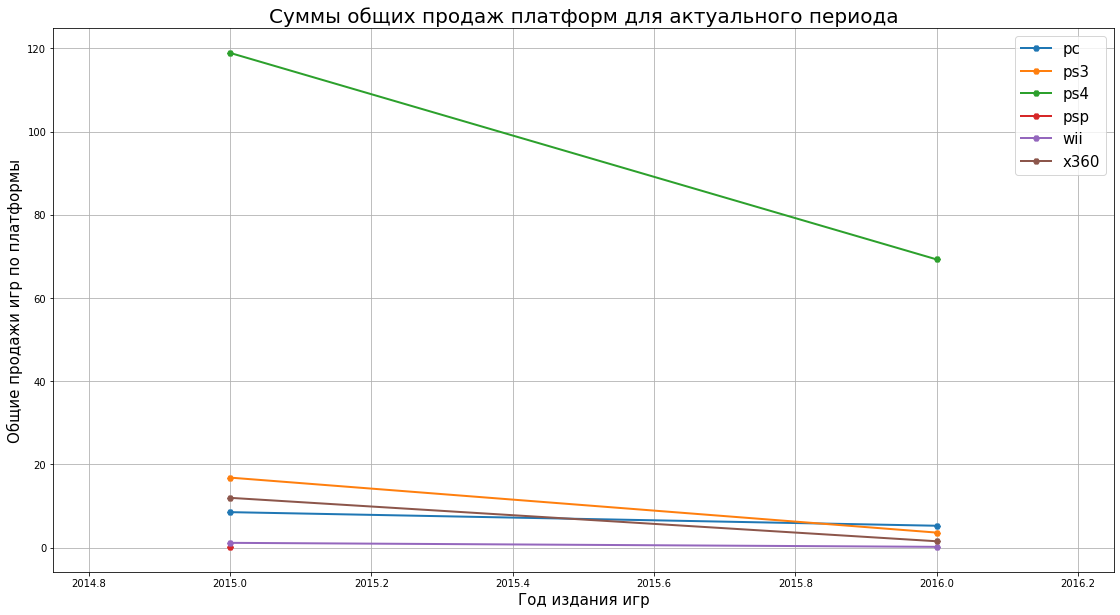

In [40]:
actual_data.pivot_table(
    index=['year_of_release'], columns='platform', values='total_sales', 
    aggfunc='sum').plot(marker='H', figsize=(19, 10), lw=2)
plt.xlim(2014.75, 2016.25)
plt.title('Суммы общих продаж платформ для актуального периода', fontsize=20)
plt.grid()
plt.legend(fontsize=15)
plt.xlabel('Год издания игр', fontsize=15)
plt.ylabel('Общие продажи игр по платформы', fontsize=15)
plt.show()

**Выводы**: отмечается общая тенденция снижения прибыли с продаж игр большинства платформ. Относительно стабильны продажи на платформах pc и wii.

Построим графики сравнения продаж по каждой платформе в виде "ящиков с усами" из новой таблицы

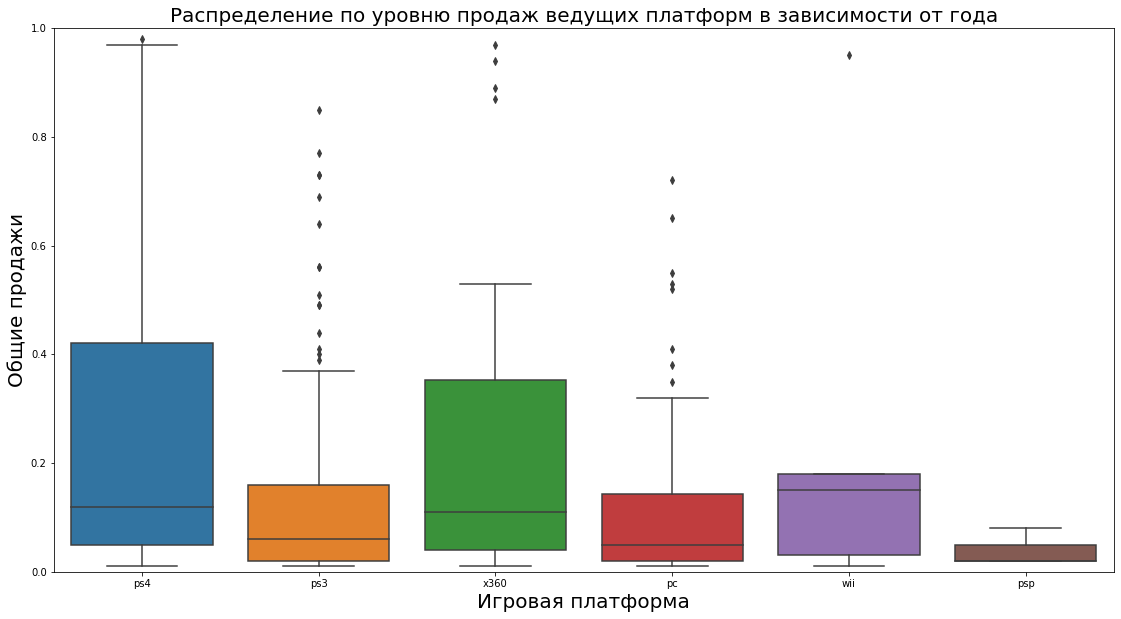

In [41]:
plt.figure(figsize=(19, 10))
# построим "ящик с усами" отсортированной по общему уровню продаж игр каждой платформы итоговой актуальной таблицы
sns.boxplot(x='platform', y='total_sales', data=actual_data.sort_values(by='total_sales', ascending=False))
plt.ylim(0, 1)
plt.title('Распределение по уровню продаж ведущих платформ в зависимости от года', fontsize=20)
plt.ylabel('Общие продажи', fontsize=20)
plt.xlabel('Игровая платформа', fontsize=20)
plt.show()

**Промежуточные выводы по графикам**: подтверждаются высокий уровень продаж платформы ps4 - третий квартиль суммы продаж по этой платформе превышает сумму продаж практически каждой платформы. Платформа ps3 также актауальна, однако, вероятно, за счет большей стоимости некоторых игр, в отличие от платформы x360.

**Выводы**
- выявили актуальный период с 2015 по 2016 год;
- выявились следующие перспективные игровые платформы (в порядке убывания продаж игр): ps4, pc, x360, wii, ps3, psp;
- в среднем, платформы "живут" около 10-13 лет, за редким исключением (исключение - платформа pc). 

## 3.3 Влияние отзывов пользователей и критиков на продажи. Диаграммы рассеяния. Коррелция между отзывами и продажами

Создадим список актуальных платформ, чтобы к ним было проще обращаться

In [42]:
actual_platform = list(actual_data['platform'].unique())

print('Список популярных платформ: \n', actual_platform)

Список популярных платформ: 
 ['ps4', 'ps3', 'x360', 'pc', 'wii', 'psp']


Проверим корреляцию между отзывов пользователей и критиков и продаж игр

In [43]:
# цикл построения корреляций отзывов пользователей и критиков на продажи для актуальных платформ
for i in actual_platform:
    print('\nКорреляция между оценкой критиков и общими продажами игр на платформе {}:\n{}\n'.format(i, 
          round(data['total_sales'].corr(data.loc[data['platform'] == i]['critic_score']), 2)))
    print('Корреляция между оценкой пользоватей и общими продажами игр на платформе {}:\n{}'.format(i, 
          round(data['total_sales'].corr(data.loc[data['platform'] == i]['user_score']), 2)))
    print('_'*80)


Корреляция между оценкой критиков и общими продажами игр на платформе ps4:
0.41

Корреляция между оценкой пользоватей и общими продажами игр на платформе ps4:
-0.03
________________________________________________________________________________

Корреляция между оценкой критиков и общими продажами игр на платформе ps3:
0.43

Корреляция между оценкой пользоватей и общими продажами игр на платформе ps3:
0.13
________________________________________________________________________________

Корреляция между оценкой критиков и общими продажами игр на платформе x360:
0.39

Корреляция между оценкой пользоватей и общими продажами игр на платформе x360:
0.11
________________________________________________________________________________

Корреляция между оценкой критиков и общими продажами игр на платформе pc:
0.26

Корреляция между оценкой пользоватей и общими продажами игр на платформе pc:
0.01
________________________________________________________________________________

Корреляция меж

**Промежуточные выводы**: можно отметить, что есть более заметная связь между отзывами критиков и продажами игр на платформах ps4, ps3, x360. Для остальных платформ связь более слабая. Возможно она обусловлена третьими факторами и не является линейной. Проверим это с помощью диаграмм рассеяния.

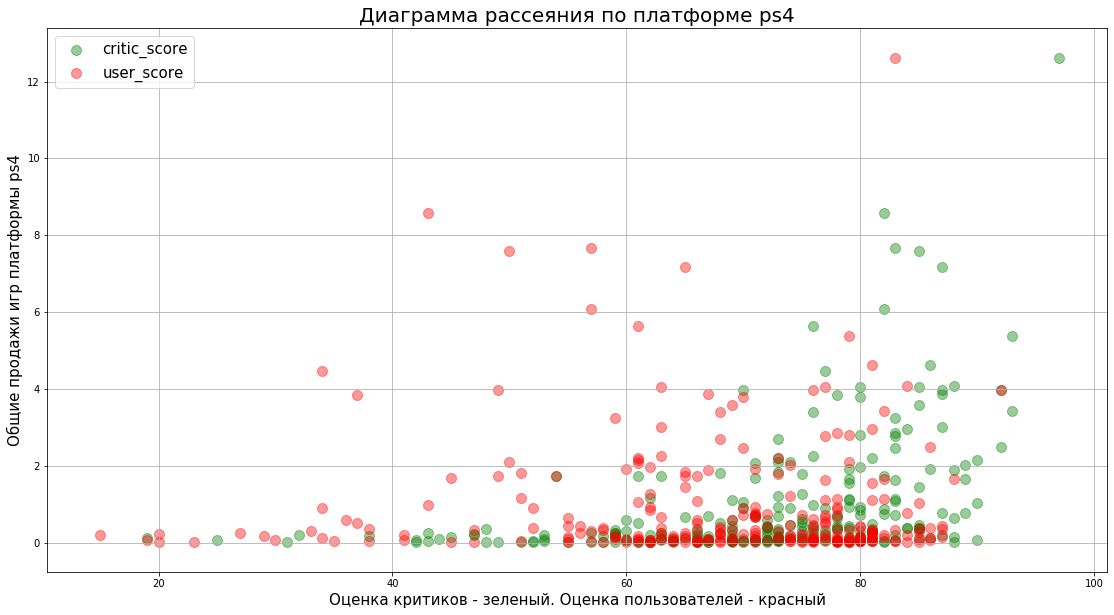

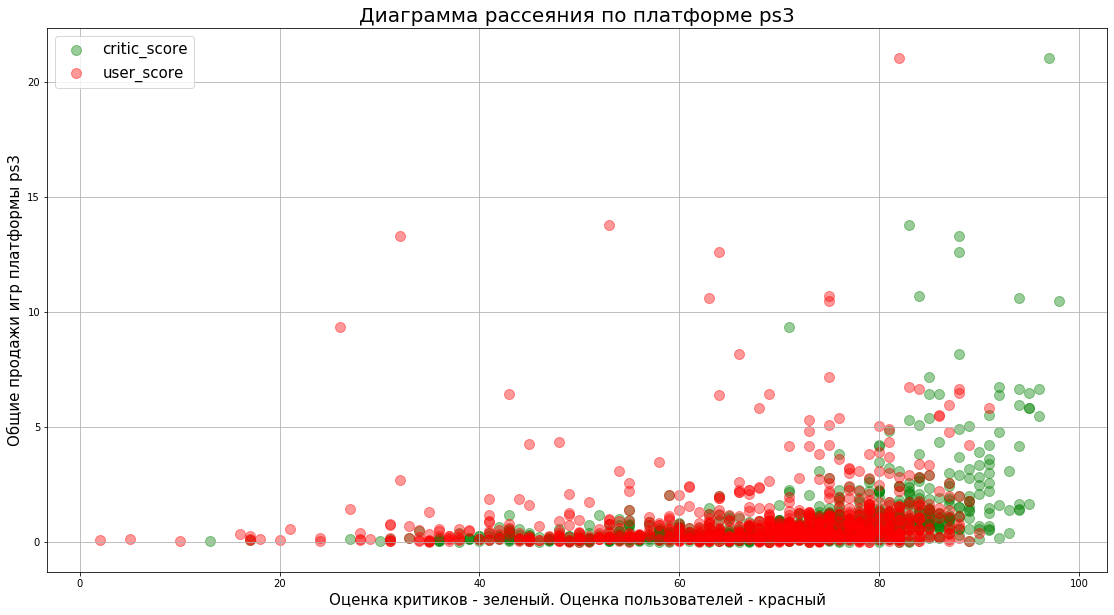

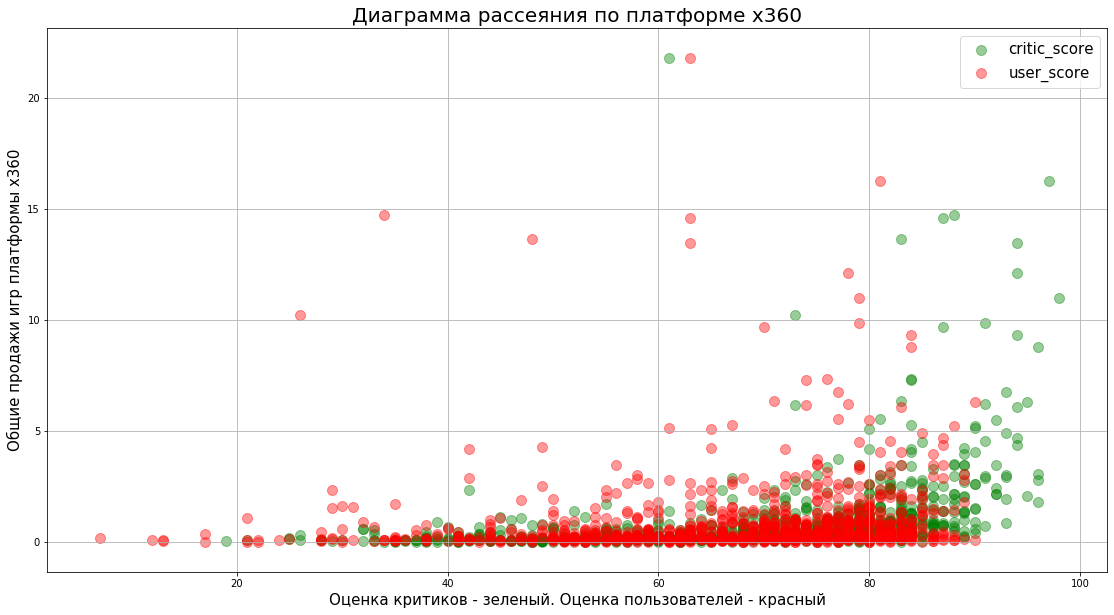

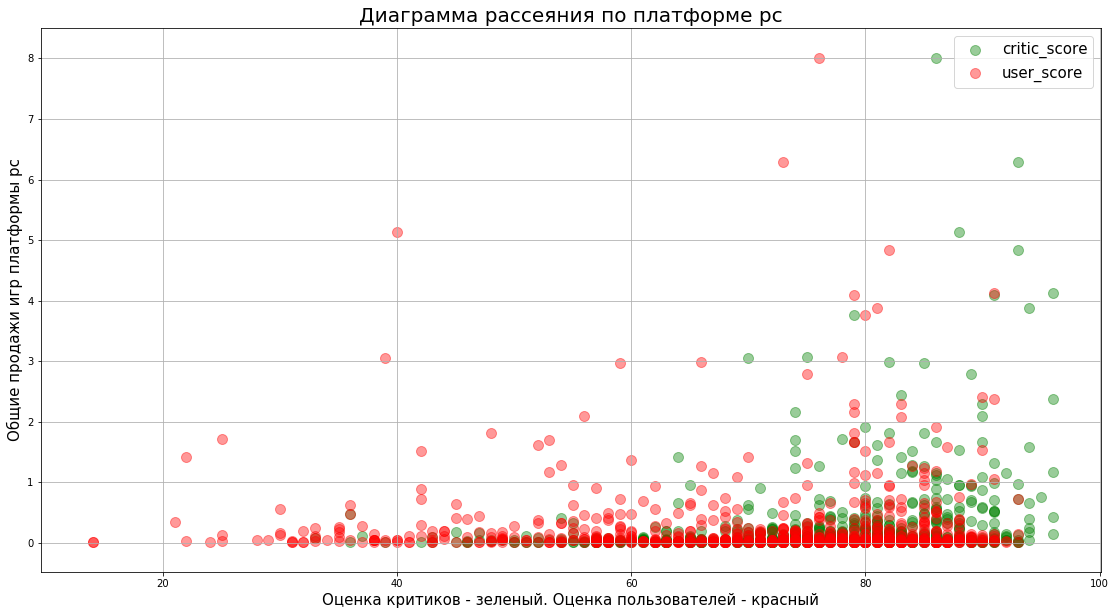

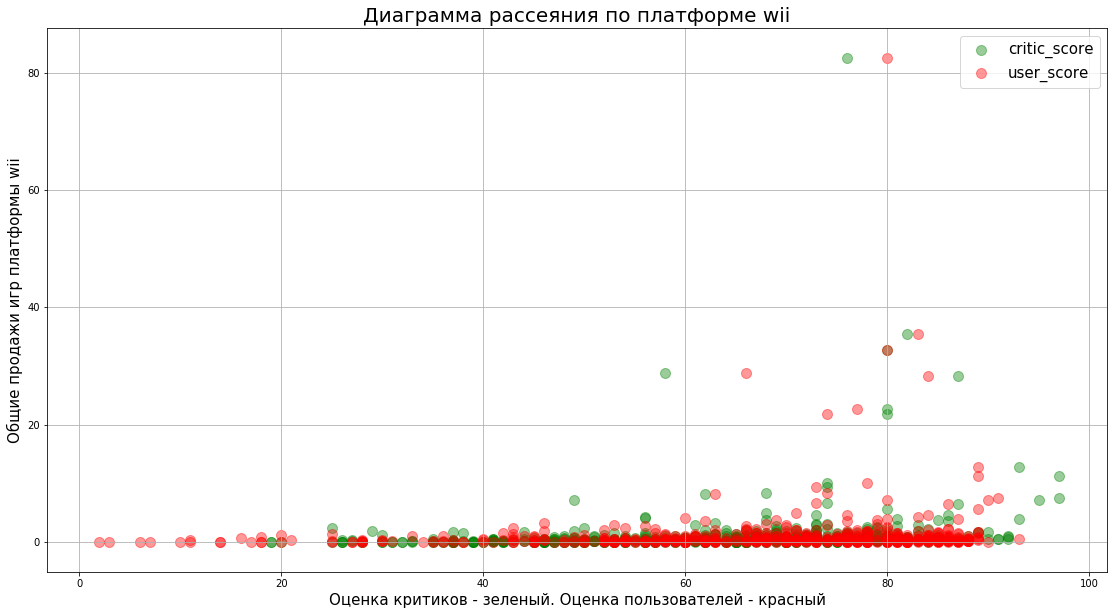

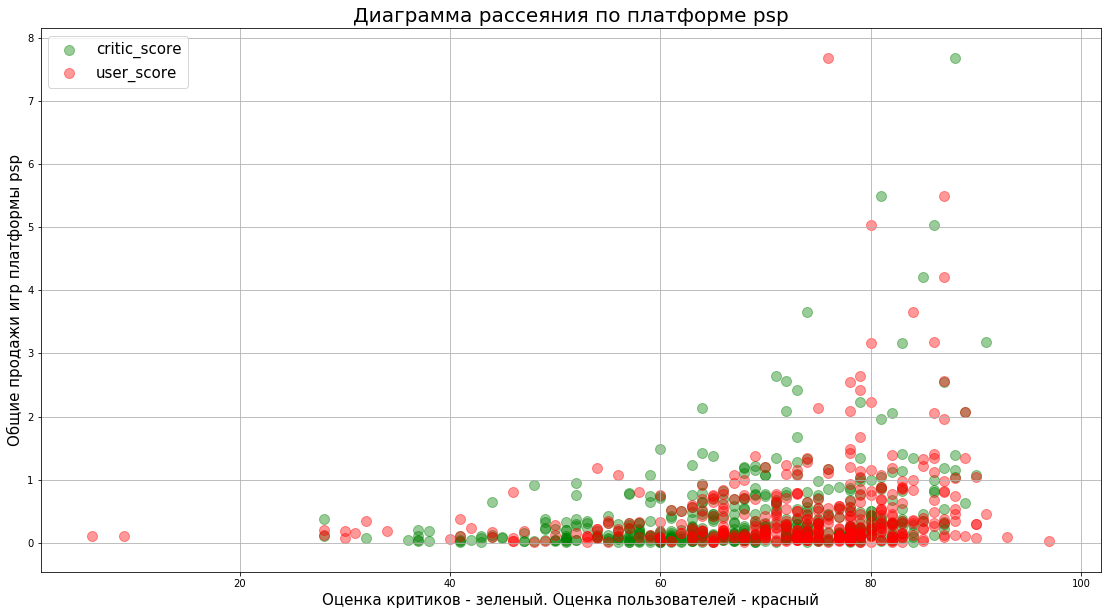

In [44]:
# цикл построения диаграмм рассеяния для каждой игровой платформы
for i in actual_platform:
    plt.figure(figsize=(19, 10))
    plt.scatter(y='total_sales', x='critic_score', data=data.loc[data['platform'] == i],
            alpha=0.40, s=100, color='green')
    plt.title('Диаграмма рассеяния по платформе {}'.format(i), fontsize=20)
    plt.scatter(y='total_sales', x='user_score', data=data.loc[data['platform'] == i],
            alpha=0.40, s=100, color='red')
    plt.title('Диаграмма рассеяния по платформе {}'.format(i), fontsize=20)
    plt.legend(['critic_score','user_score'], fontsize=15)
    plt.xlabel('Оценка критиков - зеленый. Оценка пользователей - красный', fontsize=15)
    plt.ylabel('Общие продажи игр платформы {}'.format(i), fontsize=15)
    plt.grid()
    plt.show() 


**Выводы**
- для платформы ps4: имеется большая связь между уровнем продаж и отзывами критиков. Связь между отзывами пользователей и продажами игр не столь выражена;
- для платформы pc: имеется более заметная связь между уровнем продаж игр и отзывами критиков. Связь между отзывами пользователей и продажами слабая;
- для платформы x360: имеется более заметная связь между уровнем продаж игр и отзывами критиков. Связь между отзывами пользователей и продажами также имеется, но менее заметная;
- для платформы wii связь между отзывами критиков и пользовтелей в соотношении с прожадами слабая;
- для платформы ps3: имеется связь между продажами игр и отзывами критиков, менее заметная связь между продажами и отзывами игроков
- для платформы psp: имеется заметная связь между отзывами пользователей и критков и суммой продаж

## 3.4 Общее распределение игр по жанрам. Самый прибыльный жанр. Жанры с высокими и низкими продажами.

Для начала из общей таблицы создадим сводную таблицу по жанрам и уровню продаж по ним

In [45]:
genres_range = data.pivot_table(index='genre', values='total_sales', aggfunc='sum'
).sort_values(by='total_sales').reset_index()
print('Сводная таблица жанров:\n{}'.format(genres_range))

Сводная таблица жанров:
           genre  total_sales
0       strategy       174.23
1      adventure       237.59
2         puzzle       242.57
3     simulation       389.97
4       fighting       447.53
5         racing       728.67
6           misc       802.51
7       platform       827.77
8   role-playing       934.56
9        shooter      1052.45
10        sports      1331.27
11        action      1744.17


Пострим график распределения жанров в зависимости от их продаж

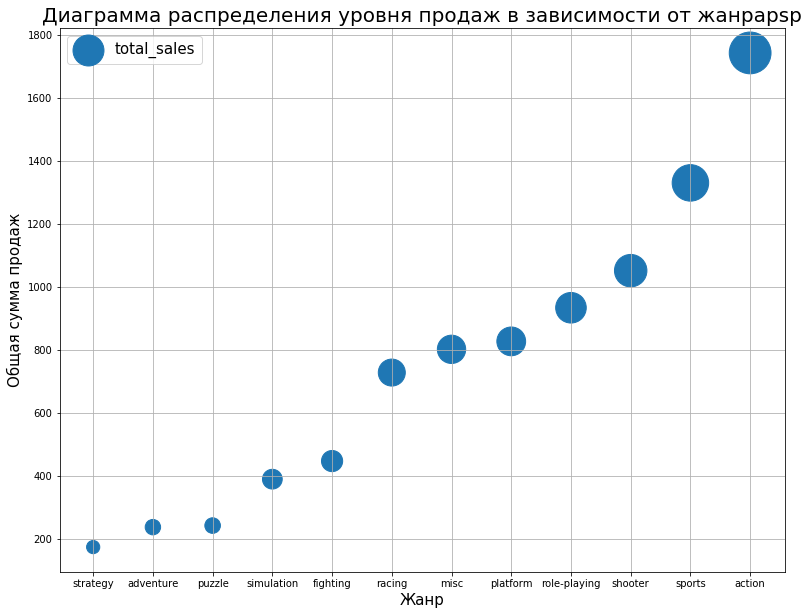

In [46]:
# используем диаграмму для наглядного отображения уроня продаж жанров

plt.figure(figsize=(13, 10))
plt.scatter(x='genre', y='total_sales', data=genres_range, s='total_sales')

# декорирование графика
plt.title('Диаграмма распределения уровня продаж в зависимости от жанра{}'.format(i), fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('Жанр', fontsize=15)
plt.ylabel('Общая сумма продаж', fontsize=15)
plt.grid()
plt.show()

**Выводы**

Жанр Action наиболее популярен, пользуется больлшим спросом среди остальных. Далее по популярности можно выделиить жанр Sports, Shooter, Role-Playing, Platform, Misc, Racing. Остальные жанры сильно отстают.

# Шаг 4. Портрет пользователя каждого региона

## 4.1 Самые популярные платформы (топ-5) каждого региона (NA, EU, JP). Различия в долях продаж

По отфильтрованным данным `filtered_actual_data` актульного периода, определим предпочтения в игровых платформах каждого региона.

Создадим сводную таблицу региона NA

In [47]:
# создадим переменную, которой присвоим сводную таблицу региона NA
na_region_platf = (actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum')
                   .sort_values(by='na_sales', ascending=False).reset_index())

# выделим топ-5 популярных платформ региона
na_region_top5_platf = na_region_platf.head()

# для подсчета доли продаж популярных платформ добавим в сводную таблицу 
# региона столбец конверсии
na_region_top5_platf['conversion'] = round(
    na_region_top5_platf['na_sales']/na_region_platf['na_sales'].sum()*100, 2)

# выведем полученную таблицу на экран
display('Таблица распределения продаж топ-5 платформ в регионе NA', na_region_top5_platf)

'Таблица распределения продаж топ-5 платформ в регионе NA'

,platform,na_sales,conversion
0,ps4,63.86,78.09
1,x360,8.05,9.84
2,ps3,5.66,6.92
3,pc,3.72,4.55
4,wii,0.49,0.60


Выполним схожие манипуляции для двух других регионов: EU и JP

In [48]:
# создадим переменную, которой присвоим сводную таблицу региона EU
eu_region_platf = (actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
                   .sort_values(by='eu_sales', ascending=False).reset_index())

# выделим топ-5 популярных платформ региона
eu_region_top5_platf = eu_region_platf.head()

# для подсчета доли продаж популярных платформ добавим в сводную таблицу 
# региона столбец конверсии
eu_region_top5_platf['conversion'] = round(
    eu_region_top5_platf['eu_sales']/eu_region_platf['eu_sales'].sum()*100, 2)

# выведем полученную таблицу на экран
display('Таблица распределения продаж топ-5 платформ в регионе EU',eu_region_top5_platf)

'Таблица распределения продаж топ-5 платформ в регионе EU'

,platform,eu_sales,conversion
0,ps4,83.54,79.65
1,pc,9.10,8.68
2,ps3,7.30,6.96
3,x360,4.21,4.01
4,wii,0.73,0.70


In [49]:
# создадим переменную, которой присвоим сводную таблицу региона JP
jp_region_platf = (actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                   .sort_values(by='jp_sales', ascending=False).reset_index())
# выделим топ-5 популярных платформ региона
jp_region_top5_platf = jp_region_platf.head()

# для подсчета доли продаж популярных платформ добавим в сводную таблицу 
# региона столбец конверсии
jp_region_top5_platf['conversion'] = round(
    jp_region_top5_platf['jp_sales']/jp_region_platf['jp_sales'].sum()*100, 2)

# выведем полученную таблицу на экран
display('Таблица распределения продаж топ-5 платформ в регионе JP',jp_region_top5_platf)

'Таблица распределения продаж топ-5 платформ в регионе JP'

,platform,jp_sales,conversion
0,ps4,12.05,70.3
1,ps3,4.97,29.0
2,psp,0.12,0.7
3,pc,0.00,0.0
4,wii,0.00,0.0


**Выводы** 
- для всех регионов характерно преобладание на рынке игровой платформы ps4:
 - для региона NA платформа ps4 лидирует с долей продаж 78.09 %
 - для региона EU платформа ps4 лидирует с долей продаж 79.65 %
 - для региона JP платформа ps4 лидирует с долей продаж 70.3 %
- в регионе NA второй по популярности платформой является x360 с долей продаж 9.84 %
- в регионе EU второй по популярности платформой является pc с долей продаж 8.68 %
- в регионе JP второй по популярности платформой является ps3 с долей продаж 29.0 %
- на третьем месте распологается платформа:
 - ps3 для региона NA с долей продаж 6.92 %
 - ps3 для региона EU с долей продаж 6.96 %
 - psp для региона JP с долей продаж 0.7 %

## 4.2 Самые популярные жанры (топ-5) каждого региона (NA, EU, JP)

По отсортированным данным `actual_data` актульного периода, определим предпочтения в игровых жанрах каждого региона.

In [50]:
# создадим переменную, которой присвоим сводную таблицу жанров региона NA
na_region_top5_genre = (actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum')
                   .sort_values(by='na_sales', ascending=False).reset_index()).head()

# выведем таблицу на экран
display('Распределение жанров в регионе NA', na_region_top5_genre)

'Распределение жанров в регионе NA'

,genre,na_sales
0,shooter,24.43
1,action,20.50
2,sports,17.23
3,role-playing,8.41
4,fighting,3.42


In [51]:
# создадим переменную, которой присвоим сводную таблицу жанров региона EU
eu_region_top5_genre = (actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
                   .sort_values(by='eu_sales', ascending=False).reset_index()).head()

# выведем таблицу на экран
display('Распределение жанров в регионе EU',eu_region_top5_genre)

'Распределение жанров в регионе EU'

,genre,eu_sales
0,shooter,28.77
1,action,25.22
2,sports,22.17
3,role-playing,11.05
4,racing,4.12


In [52]:
# создадим переменную, которой присвоим сводную таблицу жанров региона JP
jp_region_top5_genre = (actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
                   .sort_values(by='jp_sales', ascending=False).reset_index()).head()

# выведем таблицу на экран
display('Распределение жанров в регионе JP',jp_region_top5_genre)

'Распределение жанров в регионе JP'

,genre,jp_sales
0,action,6.84
1,role-playing,4.28
2,shooter,2.19
3,sports,1.16
4,fighting,1.00


**Выводы** 
- для регионов NA и EU распределение жанровых предпочтений схожее: преобладает жанры Shooter и Action
- в регионе JP преобладает жанр Action, а также отмечается предпочтение жанра Role-playing и Shooter.

## 4.3 Влияние рейтинга ESRB на продажи в отдельном регионе

По отфильтрованным данным `actual_data` актульного периода, определим влияние рейтинга ESRB на прожади в каждом регионе.

In [53]:
# создадим переменную, которой присвоим сводную таблицу жанров региона NA
na_rating_to_sales = (actual_data.pivot_table(index='rating', values='na_sales', aggfunc='sum')
                   .sort_values(by='na_sales', ascending=False).reset_index())

display('Распределение игр по рейтингам ESRB в регионе NA', na_rating_to_sales)

'Распределение игр по рейтингам ESRB в регионе NA'

,rating,na_sales
0,M,25.60
1,unknown,21.05
2,T,14.02
3,E,13.65
4,E10+,7.46


In [54]:
# создадим переменную, которой присвоим сводную таблицу жанров региона EU
eu_rating_to_sales = (actual_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
                   .sort_values(by='eu_sales', ascending=False).reset_index())

display('Распределение игр по рейтингам ESRB в регионе EU', eu_rating_to_sales)

'Распределение игр по рейтингам ESRB в регионе EU'

,rating,eu_sales
0,M,34.32
1,unknown,25.34
2,E,23.34
3,T,15.79
4,E10+,6.09


In [55]:
# создадим переменную, которой присвоим сводную таблицу жанров региона JP
jp_rating_to_sales = (actual_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
                   .sort_values(by='jp_sales', ascending=False).reset_index())

display('Распределение игр по рейтингам ESRB в регионе JP',jp_rating_to_sales)

'Распределение игр по рейтингам ESRB в регионе JP'

,rating,jp_sales
0,unknown,8.51
1,M,3.87
2,T,3.75
3,E,0.84
4,E10+,0.17


**Выводы**
- в каждом регионе присутствует достаточно большое проданных игр с неизвестным значением рейтинга. Продажи их находятся в коридоре от 8.51 до 25.34 по всем регионам
- в регионе NA и EU на первом месте предпочтений находятся игры с пометкой M - "взрослый";
- в регионе JP игры с неизвестной оценкой находятся на первом месте;


- в регионе NA и EU на втором месте предпочтений находятся игры с неизвестной пометкой - "unknown";
- в регионе JP - на втором месте предпочтений находятся игры с пометкой M - "взрослый";


- в регионе NA и JP на третьем месте предпочтений находятся игры с пометкой T - "молодежный";
- в регионе EU на третьем месте предпочтений находятся игры с пометкой E - "для каждого";

В целом можно заключить, что жанры игр с пометками M, T, E лучше продаются, чем остальные жанры

## Шаг 5. Проверка гипотез

### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем гипотезы:

- **Нулевая гипотза**: пользовательские рейтинги платформ Xbox One и PC одинаковые
- **Альтернативная гипотеза**: пользовательские рейтинги платформ Xbox One и PC значимо отличаются

Для проверки гипотез внаале проверим дисперсии и стандартные отклонения пользовательстки рейтингов исследуемых платформ

In [56]:
# Найдем стандартное отклонение и дисперсию пользовательских рейтингов платформы Xbox One
print('Дисперсия пользовательских рейтингов платформы Xbox One:', 
      round(np.var(data.query('platform == "xone" & user_score == user_score')['user_score'], ddof=1), 2)
)
print('Стандартное отклонение пользовательских рейтингов платформы Xbox One:', 
      round(np.std(data.query('platform == "pc" & user_score == user_score')['user_score'], ddof=1), 2)
)

Дисперсия пользовательских рейтингов платформы Xbox One: 190.7
Стандартное отклонение пользовательских рейтингов платформы Xbox One: 15.3


In [57]:
# Найдем стандартное отклонение и дисперсию пользовательских рейтингов платформы PC
print('Дисперсия пользовательских рейтингов платформы PC:', 
      round(np.var(data.query('platform == "pc" & user_score == user_score')['user_score'], ddof=1), 2)
)
print('Стандартное отклонение пользовательских рейтингов платформы PC:', 
      round(np.std(data.query('platform == "pc" & user_score == user_score')['user_score'], ddof=1), 2)
)

Дисперсия пользовательских рейтингов платформы PC: 234.08
Стандартное отклонение пользовательских рейтингов платформы PC: 15.3


**Промежуточный вывод**: диспресии пользовательских рейтингов различных платформ заметно отличаются, следовательно для нахождения различий между тарифами установим занчение `equal_var`, равное `False`

Приступим к проверке гипотез. Определим уровнь значимости `alpha`, равное 0.05, как наиболее стандартное и для избежания попадания в ошибку второго рода.

In [58]:
# Проверяем гипотезу о различиях пользовательских рейтингах платформ xone и pc 

# установим статистически значимый криетрий
alpha = 0.05

# определим различия между выборками с помощью метода т-Стьюдента для независимых выборок
users_critic_diff_platform = st.ttest_ind(data.query('platform == "xone" & user_score == user_score')['user_score'],
                                 data.query('platform == "pc" & user_score == user_score')['user_score'],
                                 equal_var = False)
# выведем полученое p-значение 
print('p-значение: ', users_critic_diff_platform.pvalue)

# проверим ее соответствие статистически значимому критерию
if users_critic_diff_platform.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Нулевую гипотезу нельзя отвергнуть')

p-значение:  4.935072360183428e-06
Отклоняем нулевую гипотезу


**Выводы**
В результе проверки оказалось, что пользовательские рейтинги платформ XOne и PC статистически значимо отличаются. 

### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем гипотезы:

- **Нулевая гипотза**: средние пользовательские рейтинги жанров Action и Sports не различаются
- **Альтернативная гипотеза**: средние пользовательские рейтинги жанров Action и Sports значимо различаются

In [59]:
# Найдем стандартное отклонение и дисперсию пользовательских рейтингов жанра Action
print('Дисперсия пользовательских рейтингов жанра Action:', 
      round(np.var(data.query('genre == "action" & user_score == user_score')['user_score'], ddof=1), 2)
)
print('Стандартное отклонение пользовательских рейтингов жанра Action:', 
      round(np.std(data.query('genre == "action" & user_score == user_score')['user_score'], ddof=1), 2)
)

Дисперсия пользовательских рейтингов жанра Action: 203.17
Стандартное отклонение пользовательских рейтингов жанра Action: 14.25


In [60]:
# Найдем стандартное отклонение и дисперсию пользовательских рейтингов жанра Sports
print('Дисперсия пользовательских рейтингов жанра Sports:', 
      round(np.var(data.query('genre == "sports" & user_score == user_score')['user_score'], ddof=1), 2)
)
print('Стандартное отклонение пользовательских рейтингов жанра Sports:', 
      round(np.std(data.query('genre == "sports" & user_score == user_score')['user_score'], ddof=1), 2)
)

Дисперсия пользовательских рейтингов жанра Sports: 259.65
Стандартное отклонение пользовательских рейтингов жанра Sports: 16.11


Приступим к проверке гипотез. Определим уровнь значимости `alpha`, равное 0.05, как наиболее стандартное и для избежания попадания в ошибку второго рода.

In [61]:
# Проверяем гипотезу о сходстве пользовательских рейтингов жанров Action и Sports 

# установим статистически значимый криетрий
alpha = 0.05

# определим различия между выборками с помощью метода т-Стьюдента для независимых выборок
users_critic_diff_genres = st.ttest_ind(data.query('genre == "action" & user_score == user_score')['user_score'],
                                 data.query('genre == "sports" & user_score == user_score')['user_score'],
                                 equal_var = False)

# выведем полученое p-значение 
print('p-значение: ', users_critic_diff_genres.pvalue)

# проверим ее соответствие статистически значимому критерию
if users_critic_diff_genres.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Нулевую гипотезу нельзя отвергнуть')

p-значение:  0.1148381879149927
Нулевую гипотезу нельзя отвергнуть


**Выводы**
В результе проверки оказалось, что пользовательские рейтинги жанров Action и Sports  статистически значимо не различаются. 

# Шаг 6. Общий вывод

В результате работы было выполнено следующее.

1. Изучена общая информация о данных:
   - в таблице 16715 строк, 11 столбцов. В таблице имеются пропуски значений. Имеются типы данных: object, float64.
   - названия столбцов с разным регистром: в таблице видны разнорегистровые названия игр, жанров и платформ.
   - в столбце Name содержатся строковые значения названия игр. Чаще всего представлено название следующей игры: Need for Speed: Most Wanted - 12 упоминаний. Общее количество наименований игр - 11559;
   - в столбце Platform содержатся строковые названия игровых платформ, общее количество строк 16715, уникальных значений 31, преобладает упоминание платформы PS2 - 2161 упоминание;
   - в столбце Year_of_Release содержатся числовое значение года издания игры. Общее количество строк 16446. Чаще всего упоминается 2008, 2009 года издания. Замечены значения nan;
   - в столбце Genre содержатся строковые названия жанров игры. Общее количество строк 16713. Чаще всего упоминается жанр Action - 3369 упоминаний;
   - в столбце Critic_Score содержатся числовые значения оценки критиков. Общее количество строк 8137. Чаще всего представлена оценка 70 - 256 раз. Замечены значения nan;
   - в столбце User_Score содержатся числовые значения оценки игроков. Общее количество строк 10014. Чаще всего представлена оценка tbd - 2424 раза. Замечены значения nan; 
   - в столбце Rating содержатся строковые обозначения рейтинга игры. Общее количество строк 9949. Чаще всего представлена групп E - 3990 обозначений. Замечены значения nan, пропуски заполнены значением unknown.

2. Обработыны пропуски: принято решение воспринимать значения tbd как пропуски, незаполненные пропуски объяснены в частных пунктах работы, большинство пропусков решено не менять, чтобы не потерять важные данные, проверено наличие дубликатов (явных и неявных)

3. В таблицу добавлены дополнительные столбы суммарных прожаж игр по всем регионам. Таблица также отфильтрована по актульных платформам.

Проведен исследовательский анализ таблицы. Выявлено в результате анализа следующее:
1. Объемы выпускаемых игр резко увеличились с 2006 года, в период с 2006 г. по 2011 г. выпусклось больше всего игр в год.
2. Выявлен актуальный период анализа перспектив на 2017 год период с 2015 по 2016 год.
3. Выявлены следующие перспективные игровые платформы (в порядке убывания продаж игр): ps4, pc, x360, wii, ps3, psp.
4. Выявлено, что в среднем, платформы "живут" около 10-13 лет.
5. Жанры Shooter и Action наиболее популярны, пользуются большим спросом среди остальных. Далее по убыванию популярности можно выделиить жанры Sports, Role-Playing. Остальные жанры сильно отстают.
6. Выявлены следующие связи уровня продаж и отзывов критиков и пользователей:
    - для платформы ps4: имеется большая связь между уровнем продаж и отзывами критиков. Связь между отзывами пользователей и продажами игр не столь выражена;
    - для платформы pc: имеется более заметная связь между уровнем продаж игр и отзывами критиков. Связь между отзывами пользователей и продажами слабая;
    - для платформы x360: имеется более заметная связь между уровнем продаж игр и отзывами критиков. Связь между отзывами пользователей и продажами также имеется, но менее заметная;
    - для платформы wii связь между отзывами критиков и пользовтелей в соотношении с прожадами слабая;
    - для платформы ps3: имеется связь между продажами игр и отзывами критиков, менее заметная связь между продажами и отзывами игроков
    - для платформы psp: имеется заметная связь между отзывами пользователей и критков и суммой продаж
7. Выявлены наиболее популярные игровые жанры регионов:
    - для регионов NA и EU распределение жанровых предпочтений схожее: преобладает жанры Shooter и Action;
    - в регионе JP преобладает жанр Action, а также отмечается предпочтение жанра Role-playing и Shooter.
8. Выявлено влияние рейтинга ESRB:
    - в каждом регионе присутствует достаточно большое проданных игр с неизвестным значением рейтинга. Продажи их находятся в коридоре от 8.51 до 25.34 по всем регионам
    - в регионе NA и EU на первом месте предпочтений находятся игры с пометкой M - "взрослый";
    - в регионе JP игры с неизвестной оценкой находятся на первом месте;
    - в регионе NA и EU на втором месте предпочтений находятся игры с неизвестной пометкой - "unknown";
    - в регионе JP - на втором месте предпочтений находятся игры с пометкой M - "взрослый";
    - в регионе NA и JP на третьем месте предпочтений находятся игры с пометкой T - "молодежный";
    - в регионе EU на третьем месте предпочтений находятся игры с пометкой E - "для каждого";
    - в целом можно заключить, что жанры игр с пометками M, T, E лучше продаются, чем остальные жанры

Проверены гипотезы:
1. О сходстве средних пользовательские рейтинги платформ Xbox One и PC:
   - пользовательские рейтинги платформ XOne и PC статистически значимо отличаются - cредние оценки ользовательских оценок платформы XBox One выше, чем платформы PC
2. О  сходстве средних пользовательских рейтингах жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»):
   - пользовательские рейтинги жанров Action и Sports статистически значимо не различаются